# 评估一个在ImageNet上与训练好的模型
此处使用[**resnet50**]作为示例
## 导入库

In [1]:
import torch 
from torch import nn
import torchvision
from torchvision import transforms
from torch.nn import functional as F 

import os                               # 路径处理 
from PIL import Image                   # 图像读取  Image.open(dir)
import matplotlib.pyplot as plt         # 图像展示  plt.imshow(img)  plt.imread(img)

## 测试模型
不训练模型，仅对图片分类测试效果
### 预处理图片

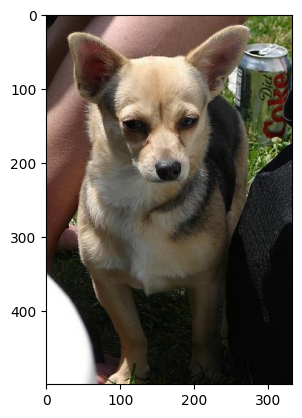

In [2]:
dir = "../datasets/ILSVRC2012_img_train_t3"   # 训练集目录
image_dir = 'n02085620/n02085620_10074.JPEG'  # 第一个类别下的第一张图片
img = Image.open(os.path.join(dir, image_dir))
plt.imshow(img)

In [3]:
trans = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

trans_img = trans(img)
print('trans_img:',trans_img.shape, type(trans_img))

batch_input = trans_img.unsqueeze(0)
print('batch_input:', batch_input.shape, type(batch_input))

trans_img: torch.Size([3, 224, 224]) <class 'torch.Tensor'>
batch_input: torch.Size([1, 3, 224, 224]) <class 'torch.Tensor'>


### 载入预训练模型

In [4]:
pretrained_net = torchvision.models.resnet50(pretrained=True)
pretrained_net

d:\Miniconda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Miniconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
pretrained_net.fc

Linear(in_features=2048, out_features=1000, bias=True)

### 输出结果

In [6]:
torch.cuda.device_count()

1

In [10]:
device = torch.device('cuda')
pretrained_net = pretrained_net.to(device)

In [12]:
pretrained_net.eval()
output = pretrained_net(batch_input.to(device))

In [14]:
output.shape

torch.Size([1, 1000])

In [16]:
pre = F.softmax(output, dim=1).squeeze(0)
pre.shape

torch.Size([1000])

In [20]:
print(pre.topk(3))
print(pre.argmax())

torch.return_types.topk(
values=tensor([0.8925, 0.0166, 0.0091], device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor([151, 263, 227], device='cuda:0'))
tensor(151, device='cuda:0')
